This notebook contains models without applying cross validation

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/creditcard.csv')
df=df.drop(columns=['Time','Amount'])
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


## Splitting dataset

In [ ]:
from sklearn.model_selection import train_test_split


print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=20)

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)

print('\nLabel Distributions: \n')
print(train_counts_label/ len(y_train))
print(test_counts_label/ len(y_train))
print("\nTrain:")
print('No Frauds', round(len(y_train[y_train==0])/len(X_train) * 100,2), '% of the dataset')
print('Frauds', round(len(y_train[y_train==1])/len(X_train) * 100,2), '% of the dataset')
print("\nTest:")
print('No Frauds', round(len(y_test[y_test==0])/len(X_test) * 100,2), '% of the dataset')
print('Frauds', round(len(y_test[y_test==1])/len(X_test) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset

Label Distributions: 

[0.99820697 0.00179303]
[0.33282461 0.00051029]

Train:
No Frauds 99.82 % of the dataset
Frauds 0.18 % of the dataset

Test:
No Frauds 99.85 % of the dataset
Frauds 0.15 % of the dataset


In [ ]:
train_df = X_train.copy()
train_df['Class'] = y_train
train_df.shape

(213605, 29)

In [ ]:
train_df['Class'].value_counts()

0    213222
1       383
Name: Class, dtype: int64

## Applying sampling techniques on the training data

Random under-sampling:
0    383
1    383
Name: Class, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


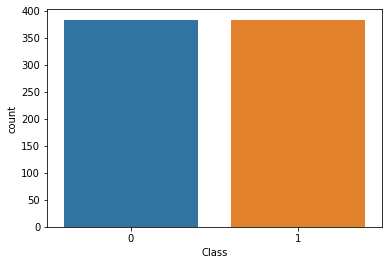

In [ ]:
#Random Under-sampling
# Class count
count_class_0, count_class_1 = train_df.Class.value_counts()

# Divide by class
train_df_0 = train_df[train_df['Class'] == 0]
train_df_1 = train_df[train_df['Class'] == 1]

train_df_0_under = train_df_0.sample(count_class_1)
train_df_under = pd.concat([train_df_0_under, train_df_1], axis=0)

print('Random under-sampling:')
print(train_df_under.Class.value_counts())

sns.countplot('Class', data=train_df_under)


Random over-sampling:
0    213222
1    213222
Name: Class, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


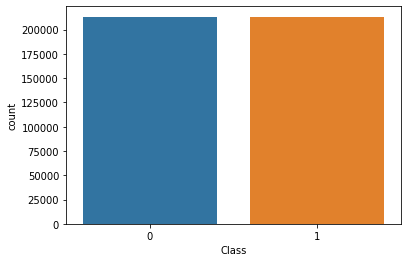

In [ ]:
#Ranodm over-Sampling
train_df_1_over = train_df_1.sample(count_class_0, replace=True)
train_df_over = pd.concat([train_df_0, train_df_1_over], axis=0)

print('Random over-sampling:')
print(train_df_over.Class.value_counts())

sns.countplot('Class', data=train_df_over)

SMOTE over-sampling:
0    213222
1    213222
Name: Class, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


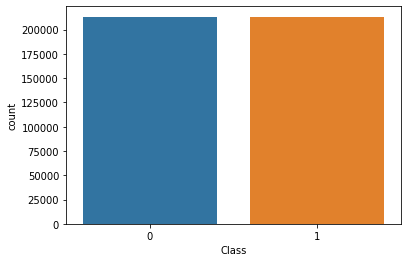

In [ ]:
# SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
sm = SMOTE()
X_sm, y_sm = sm.fit_resample(X_train, y_train)

train_df_sm = X_sm
train_df_sm['Class'] = y_sm

print('SMOTE over-sampling:')
print(train_df_sm.Class.value_counts())
sns.countplot('Class', data=train_df_sm)

In [ ]:
train_df_sm.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class'],
      dtype='object')

In [ ]:
X_train_under = train_df_under.drop(columns=['Class'])
y_train_under = train_df_under["Class"]

In [ ]:
X_train_smote = train_df_sm.drop(columns=['Class'])
y_train_smote = train_df_sm["Class"]

In [ ]:
X_train_over = train_df_over.drop(columns=['Class'])
y_train_over = train_df_over["Class"]

In [ ]:
#data contains SMOTE and under-sampling datasets
data=[
    [X_train_smote,y_train_smote,"SMOTE"],
    [X_train_under,y_train_under,"Under Sampling"]
]

In [ ]:
#data2 contains over-sampling and datasets(without applying sampling technique)
data2=[
    [X_train_over,y_train_over,"Over Sampling"],
    [X_train,y_train,"No Sampling"]
]

In [ ]:
#Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

classifiers = {
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "LogisticRegression":LogisticRegression(max_iter=1000),
    "RandomForest":RandomForestClassifier()
}

In [ ]:
from sklearn.metrics import accuracy_score
for X,y,name in data:
    print("\n\n" +name+ ":\n")
    for key, classifier in classifiers.items():
        clf=classifier.fit(X,y)
        training_score = accuracy_score(y_test,clf.predict(X_test))
        print("Classifiers:", classifier.__class__.__name__, "has a training score of", \
              (training_score)*100, "% accuracy score")



SMOTE:

Classifiers: DecisionTreeClassifier has a training score of 99.76966939130924 % accuracy score
Classifiers: LogisticRegression has a training score of 97.61944889188506 % accuracy score
Classifiers: RandomForestClassifier has a training score of 99.95365298727565 % accuracy score


Under Sampling:

Classifiers: DecisionTreeClassifier has a training score of 87.95820342125221 % accuracy score
Classifiers: LogisticRegression has a training score of 96.255723153844 % accuracy score
Classifiers: RandomForestClassifier has a training score of 97.55905732985029 % accuracy score


In [ ]:

from sklearn.metrics import accuracy_score
for X,y,name in data2:
    print("\n\n" +name+ ":\n")
    for key, classifier in classifiers.items():
        clf=classifier.fit(X,y)
        training_score = accuracy_score(y_test,clf.predict(X_test))
        print("Classifiers:", classifier.__class__.__name__, "has a training score of", \
              (training_score)*100, "% accuracy score")



Over Sampling:

Classifiers: DecisionTreeClassifier has a training score of 99.91854161399961 % accuracy score
Classifiers: LogisticRegression has a training score of 97.81326367236875 % accuracy score
Classifiers: RandomForestClassifier has a training score of 99.9592708069998 % accuracy score


No Sampling:

Classifiers: DecisionTreeClassifier has a training score of 99.92135052386169 % accuracy score
Classifiers: LogisticRegression has a training score of 99.91854161399961 % accuracy score
Classifiers: RandomForestClassifier has a training score of 99.96348417179293 % accuracy score


From above we can say that most the model acheived high accuracy,
but this can be overfitting problem.
1. In this type of imbalanced data, the model accuracy score is not meaningful.
2. In such cases, the results are always biased towards the majority samples.
3. Though we have applied sampling techniques to acheive equal distributions,
   we shuold not use accuracy_score to evaluate this kind imbalanced binary classifiaction problems.

# Let's apply another ensemble approach, BaggingClassifier with base_estimator as DecisionTreeClassifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag=BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators= 10,
    max_samples=0.8,
    random_state=0
)

bag.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  random_state=0)

In [ ]:
bag_OverSampling=BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators= 10,
    max_samples=0.8,
    random_state=0)
bag_Undersampling=BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators= 10,
    max_samples=0.8,
    random_state=0)
bag_smote=BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators= 10,
    max_samples=0.8,
    random_state=0)


In [ ]:
bag_Undersampling.fit(X_train_under,y_train_under)
bag_OverSampling.fit(X_train_over,y_train_over)
bag_smote.fit(X_train_smote,y_train_smote)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


DT = DecisionTreeClassifier()
LR= LogisticRegression()
RF = RandomForestClassifier()

DT.fit(X_train,y_train)
LR.fit(X_train,y_train)
RF.fit(X_train,y_train)

decision_OverSampling = DecisionTreeClassifier()
logistic_OverSampling = LogisticRegression()
RF_OverSampling = RandomForestClassifier()


decision_OverSampling.fit(X_train_over,y_train_over)
logistic_OverSampling.fit(X_train_over,y_train_over)
RF_OverSampling.fit(X_train_over,y_train_over)




RandomForestClassifier()

In [ ]:
decision_UnderSampling = DecisionTreeClassifier()
logistic_UnderSampling = LogisticRegression()
RF_UnderSampling = RandomForestClassifier()

decision_UnderSampling.fit(X_train_under,y_train_under)
logistic_UnderSampling.fit(X_train_under,y_train_under)
RF_UnderSampling.fit(X_train_under,y_train_under)


decision_smote = DecisionTreeClassifier()
logistic_smote = LogisticRegression()
RF_smote = RandomForestClassifier()


decision_smote.fit(X_train_smote,y_train_smote)
logistic_smote.fit(X_train_smote,y_train_smote)
RF_smote.fit(X_train_smote,y_train_smote)


RandomForestClassifier()

# Evaluating uisng precision_recall_curve

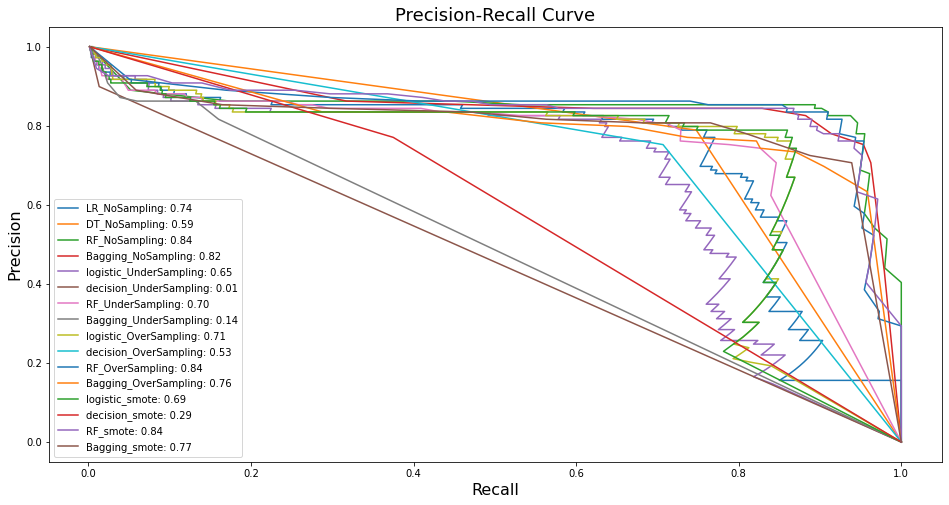

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

from sklearn.metrics import roc_curve
log_fpr, log_tpr, log_thresold =precision_recall_curve(y_test, 
                                           LR.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresold =precision_recall_curve(y_test, 
                                           DT.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_threshold = precision_recall_curve(y_test, 
                                            RF.predict_proba(X_test)[:,1])
bag_fpr, bag_tpr, bag_threshold = precision_recall_curve(y_test, 
                                            bag.predict_proba(X_test)[:,1])



lru_fpr, lru_tpr, lru_thresold = precision_recall_curve(y_test, 
                                           logistic_UnderSampling.predict_proba(X_test)[:,1])
dtu_fpr, dtu_tpr, dtu_thresold = precision_recall_curve(y_test, 
                                           decision_UnderSampling.predict_proba(X_test)[:,1])
rfu_fpr, rfu_tpr, rfu_threshold = precision_recall_curve(y_test, 
                                            RF_UnderSampling.predict_proba(X_test)[:,1])
bagu_fpr, bagu_tpr, bagu_threshold = precision_recall_curve(y_test, 
                                            bag_Undersampling.predict_proba(X_test)[:,1])


lro_fpr, lro_tpr, lro_threshold =precision_recall_curve(y_test, 
                                               logistic_OverSampling.predict_proba(X_test)[:,1])
dto_fpr, dto_tpr, dto_thresold = precision_recall_curve(y_test, 
                                           decision_OverSampling.predict_proba(X_test)[:,1])
rfo_fpr, rfo_tpr, rfo_threshold = precision_recall_curve(y_test, 
                                            RF_OverSampling.predict_proba(X_test)[:,1])
bago_fpr, bago_tpr, bago_threshold = precision_recall_curve(y_test, 
                                            bag_OverSampling.predict_proba(X_test)[:,1])


lrsm_fpr, lrsm_tpr, lrsm_threshold = precision_recall_curve(y_test, 
                                               logistic_smote.predict_proba(X_test)[:,1])
dtsm_fpr, dtsm_tpr, dtsm_threshold = precision_recall_curve(y_test, 
                                               decision_smote.predict_proba(X_test)[:,1])
rfsm_fpr, rfsm_tpr, rfsm_threshold = precision_recall_curve(y_test, 
                                               RF_smote.predict_proba(X_test)[:,1])
bagsm_fpr, bagsm_tpr, bagsm_threshold = precision_recall_curve(y_test, 
                                               bag_smote.predict_proba(X_test)[:,1])



plt.figure(figsize=(16,8))
plt.title('Precision-Recall Curve', fontsize=18)
plt.plot(log_fpr, log_tpr, 
         label='LR_NoSampling: {0:0.2f}'.format( \
             average_precision_score(y_test, LR.predict_proba(X_test)[:,1])))
plt.plot(dt_fpr, dt_tpr, 
         label='DT_NoSampling: {0:0.2f}'.format( \
             average_precision_score(y_test, DT.predict_proba(X_test)[:,1])))
plt.plot(rf_fpr, rf_tpr, 
         label='RF_NoSampling: {0:0.2f}'.format( \
                                      average_precision_score(y_test, RF.predict_proba(X_test)[:,1])))
plt.plot(bag_fpr, bag_tpr, 
         label='Bagging_NoSampling: {0:0.2f}'.format( \
             average_precision_score(y_test, bag.predict_proba(X_test)[:,1])))

plt.plot(lru_fpr, lru_tpr, 
         label='logistic_UnderSampling: {0:0.2f}'.format( \
             average_precision_score(y_test, logistic_UnderSampling.predict_proba(X_test)[:,1])))
plt.plot(dtu_fpr, dtu_tpr, 
         label='decision_UnderSampling: {0:0.2f}'.format( \
             average_precision_score(y_test, decision_UnderSampling.predict_proba(X_test)[:,1])))
plt.plot(rfu_fpr, rfu_tpr, 
         label='RF_UnderSampling: {0:0.2f}'.format( \
             average_precision_score(y_test, RF_UnderSampling.predict_proba(X_test)[:,1])))
plt.plot(bagu_fpr, bagu_tpr, 
         label='Bagging_UnderSampling: {0:0.2f}'.format( \
             average_precision_score(y_test, bag_Undersampling.predict_proba(X_test)[:,1])))

plt.plot(lro_fpr, lro_tpr, 
         label='logistic_OverSampling: {0:0.2f}'.format( \
             average_precision_score(y_test, logistic_OverSampling.predict_proba(X_test)[:,1])))
plt.plot(dto_fpr, dto_tpr, 
         label='decision_OverSampling: {0:0.2f}'.format( \
             average_precision_score(y_test,decision_OverSampling.predict_proba(X_test)[:,1])))
plt.plot(rfo_fpr, rfo_tpr, 
         label='RF_OverSampling: {0:0.2f}'.format( \
             average_precision_score(y_test, RF_OverSampling.predict_proba(X_test)[:,1])))
plt.plot(bago_fpr, bago_tpr, 
         label='Bagging_OverSampling: {0:0.2f}'.format( \
             average_precision_score(y_test, bag_OverSampling.predict_proba(X_test)[:,1])))

plt.plot(lrsm_fpr, lrsm_tpr, 
         label='logistic_smote: {0:0.2f}'.format( \
             average_precision_score(y_test, logistic_smote.predict_proba(X_test)[:,1])))
plt.plot(dtsm_fpr, dtsm_tpr, 
         label='decision_smote: {0:0.2f}'.format( \
             average_precision_score(y_test, decision_smote.predict_proba(X_test)[:,1])))
plt.plot(rfsm_fpr, rfsm_tpr, 
         label='RF_smote: {0:0.2f}'.format( \
             average_precision_score(y_test, RF_smote.predict_proba(X_test)[:,1])))

plt.plot(bagsm_fpr, bagsm_tpr, 
         label='Bagging_smote: {0:0.2f}'.format( \
             average_precision_score(y_test, bag_smote.predict_proba(X_test)[:,1])))


plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.legend()
plt.show()

After evaluating all the models we can see that though most of the accuracies are approximately 99% but the average precisions are different. This is the drawback of accuracy score,in case of extreme imbalanced class distribution accuracy score is not meaningful. 

In such cases the precision-recall curve is best for identifying good models.The precision-recall curve is calculated based on precision and recall of model that shows how the model is performing in different threshold values in the curve.It is useful when the dataset has an imbalanced distribution. Because in this measurement, the positive outcomes are the more class of interest than the negative ones. Since precision and recall do not use true negative values while calculation,it does not affect the imbalanced data.

## Bagging, Random Forest and Random Forest with SMOTE are best here

## Classification Reports

In [ ]:
from sklearn.metrics import classification_report

print('Logistic Regression without Sampling:')
print(classification_report(y_test, LR.predict(X_test)))

print('Decision Tree without Sampling:')
print(classification_report(y_test, DT.predict(X_test)))

print('Random Forest without Sampling:')
print(classification_report(y_test, RF.predict(X_test)))
print('bagging without Sampling:')
print(classification_report(y_test, bag.predict(X_test)))





print('Logistic Regression with Under Sampling:')
print(classification_report(y_test, logistic_UnderSampling.predict(X_test)))

print('Decision Tree with Under Sampling:')
print(classification_report(y_test, decision_UnderSampling.predict(X_test)))

print('Random Forest with Under Sampling:')
print(classification_report(y_test, RF_UnderSampling.predict(X_test)))

print('Bagging with Under Sampling:')
print(classification_report(y_test, bag_Undersampling.predict(X_test)))



Logistic Regression without Sampling:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71093
           1       0.82      0.60      0.69       109

    accuracy                           1.00     71202
   macro avg       0.91      0.80      0.85     71202
weighted avg       1.00      1.00      1.00     71202

Decision Tree without Sampling:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71093
           1       0.75      0.79      0.77       109

    accuracy                           1.00     71202
   macro avg       0.87      0.89      0.88     71202
weighted avg       1.00      1.00      1.00     71202

Random Forest without Sampling:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71093
           1       0.95      0.79      0.86       109

    accuracy                           1.00     71202
   macro avg       0.97   

In [ ]:
print('Logistic Regression with Over Sampling:')
print(classification_report(y_test, logistic_OverSampling.predict(X_test)))
print('Decision with Over Sampling:')
print(classification_report(y_test, decision_OverSampling.predict(X_test)))
print('Random Forest with Over Sampling:')
print(classification_report(y_test, RF_OverSampling.predict(X_test)))
print('Bagging with Over Sampling:')
print(classification_report(y_test, bag_OverSampling.predict(X_test)))

print('Logistic Regression with SMOTE:')
print(classification_report(y_test, logistic_smote.predict(X_test)))
print('Decision Tree with SMOTE:')
print(classification_report(y_test, decision_smote.predict(X_test)))
print('Random Forest with SMOTE:')
print(classification_report(y_test, RF_smote.predict(X_test)))

print('Bagging with SMOTE')
print(classification_report(y_test, bag_smote.predict(X_test)))

Logistic Regression with Over Sampling:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71093
           1       0.06      0.92      0.11       109

    accuracy                           0.98     71202
   macro avg       0.53      0.95      0.55     71202
weighted avg       1.00      0.98      0.99     71202

Decision with Over Sampling:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71093
           1       0.71      0.75      0.73       109

    accuracy                           1.00     71202
   macro avg       0.85      0.88      0.86     71202
weighted avg       1.00      1.00      1.00     71202

Random Forest with Over Sampling:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71093
           1       0.93      0.80      0.86       109

    accuracy                           1.00     71202
   macro avg       0.96  